In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_ds= "D:/ML & Deep Learning/Vehicle_data/Train"
test_ds= "D:/ML & Deep Learning/Vehicle_data/val"

In [3]:
batch_size=32
img_size=224

In [4]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,  
                                                target_size=(img_size, img_size), 
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')  
test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 11794 images belonging to 2 classes.
Found 5966 images belonging to 2 classes.


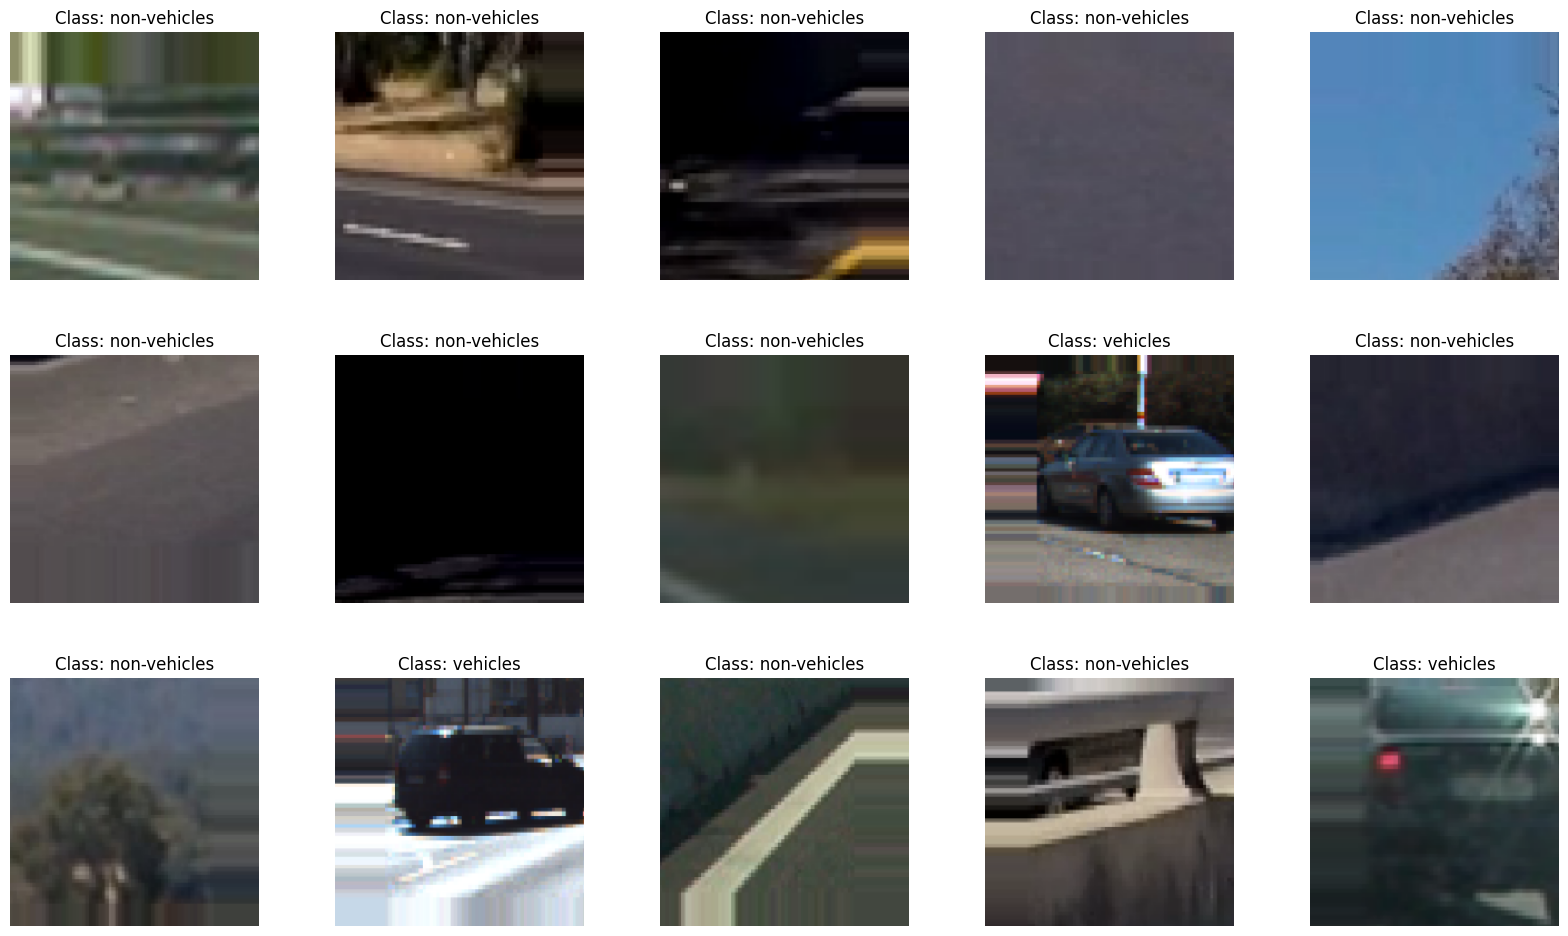

In [5]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()
images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [7]:
# train_generator.shape
print(train_generator)

In [8]:
img= train_generator[0]
print(img)

(array([[[[0.5529412 , 0.5568628 , 0.41176474],
         [0.5529412 , 0.5568628 , 0.41176474],
         [0.5529412 , 0.5568628 , 0.41176474],
         ...,
         [0.2531173 , 0.28538218, 0.1786075 ],
         [0.25490198, 0.28627452, 0.18039216],
         [0.25490198, 0.28627452, 0.18039216]],

        [[0.5529412 , 0.5568628 , 0.41176474],
         [0.5529412 , 0.5568628 , 0.41176474],
         [0.5529412 , 0.5568628 , 0.41176474],
         ...,
         [0.2531173 , 0.28538218, 0.1786075 ],
         [0.25490198, 0.28627452, 0.18039216],
         [0.25490198, 0.28627452, 0.18039216]],

        [[0.5529412 , 0.5568628 , 0.41176474],
         [0.5529412 , 0.5568628 , 0.41176474],
         [0.5529412 , 0.5568628 , 0.41176474],
         ...,
         [0.2531173 , 0.28538218, 0.1786075 ],
         [0.25490198, 0.28627452, 0.18039216],
         [0.25490198, 0.28627452, 0.18039216]],

        ...,

        [[0.29411766, 0.3254902 , 0.2627451 ],
         [0.29411766, 0.3254902 , 0.2627451 

In [9]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 2)


In [11]:
print(len(train_generator))
print(len(test_generator))

369
187


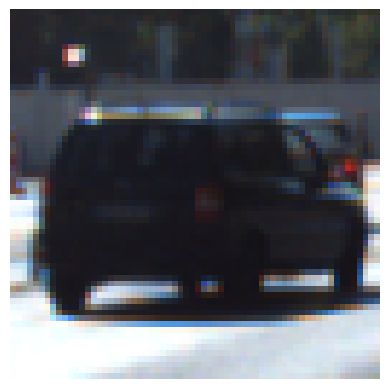

In [12]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "D:/ML & Deep Learning/Vehicle_data/val/vehicles/2.png"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [13]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9

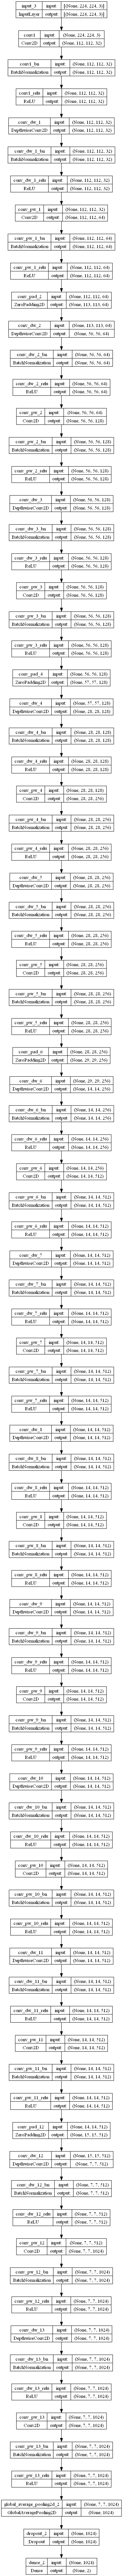

In [16]:
from keras.models import Model
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dropout
from keras.layers import Activation, BatchNormalization
from keras.utils import plot_model
from keras.applications.mobilenet import MobileNet
def mobilenet(input_shape):
    input_tensor = Input(shape=input_shape)
    base_model = MobileNet(include_top=False, input_tensor=input_tensor)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(2, activation='softmax')(x)  #place the number classes here

    model = Model(inputs=input_tensor, outputs=x)

    return model


input_shape = (224, 224, 3)
num_classes = 2

model = mobilenet(input_shape)
model.summary()
plot_model(model, to_file='mobilenet.png', show_shapes=True)

In [17]:
model = mobilenet((224, 224, 3))

In [18]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [19]:
history =model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15
 10/369 [..............................] - ETA: 41:39 - loss: 1.4532 - accuracy: 0.7063

KeyboardInterrupt: 

In [22]:
n_categories = len(os.listdir("D:/ML & Deep Learning/Vehicle_data/Train"))# number of categories print(n_categories)
n_categories

2

In [18]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,1.429496,0.545627,4.078736,0.367649
1,0.796093,0.736799,0.799458,0.727518
2,0.632591,0.784651,1.654018,0.633697
3,0.567905,0.809795,1.094110,0.721682
4,0.500734,0.830761,1.389110,0.674996


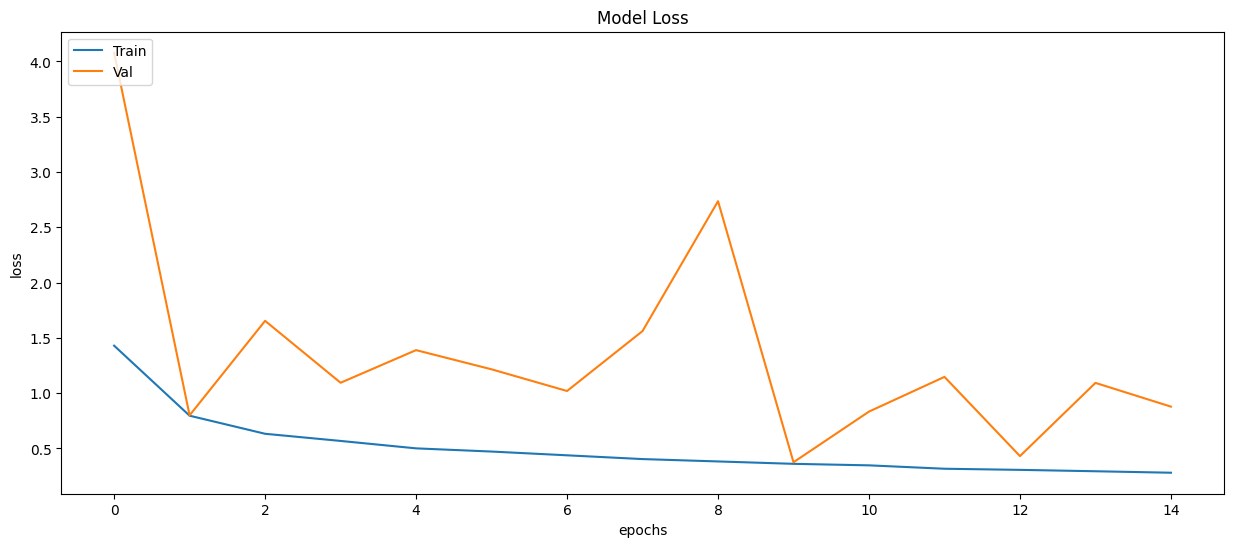

In [21]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

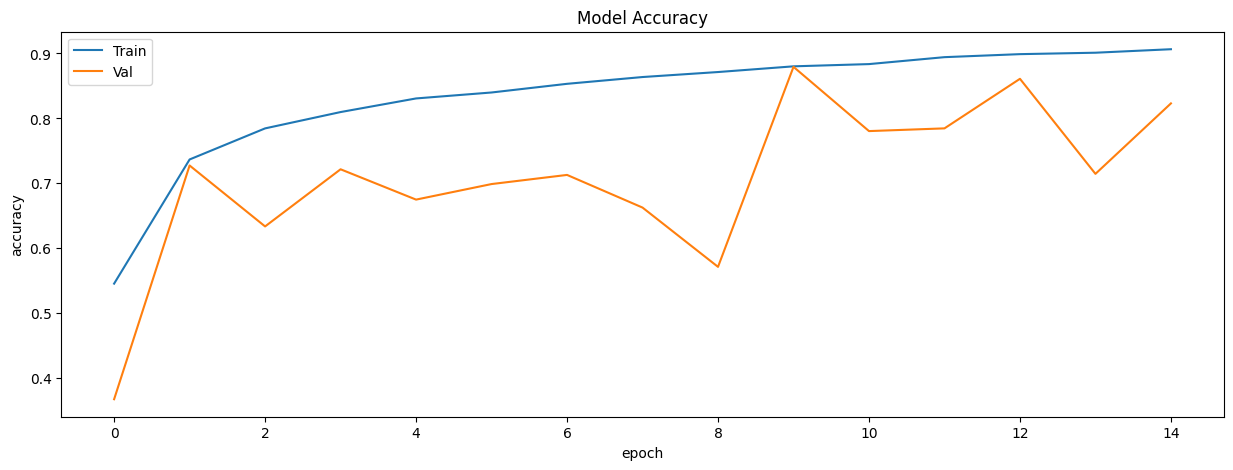

In [22]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [23]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

209/209 [==============================] - 26s 124ms/step


In [24]:
results =model.evaluate(test_generator)

209/209 [==============================] - 26s 126ms/step - loss: 0.8781 - accuracy: 0.8231


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       732
           1       0.69      0.80      0.74       643
           2       0.86      0.76      0.80       792
           3       0.95      0.68      0.79       739
           4       0.83      0.79      0.81       746
           5       0.96      0.86      0.91       435
           6       0.93      0.88      0.90       457
           7       0.98      0.77      0.86       498
           8       0.58      0.97      0.72       584
           9       0.83      1.00      0.90       805
          10       0.90      0.65      0.76       252

    accuracy                           0.82      6683
   macro avg       0.86      0.82      0.83      6683
weighted avg       0.85      0.82      0.83      6683



64/64 [==============================] - 3s 41ms/step


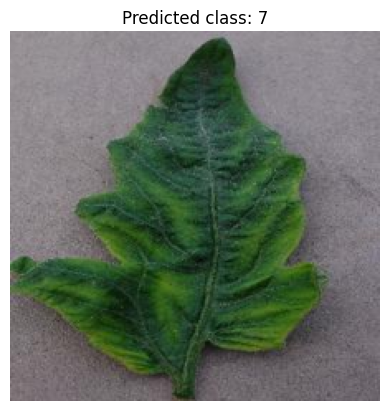

In [26]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/kaggle/input/tomato/train/Tomato_Yellow_Leaf_Curl_Virus'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [27]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : Tomato_Yellow_Leaf_Curl_Virus
Class probability: 0.998585
Predicted class for 2.jpg : Tomato_Yellow_Leaf_Curl_Virus
Class probability: 0.9987387
Predicted class for 3.jpg : Tomato_Yellow_Leaf_Curl_Virus
Class probability: 1.0
Predicted class for 4.jpg : Tomato_Yellow_Leaf_Curl_Virus
Class probability: 0.99995816
Predicted class for 5.jpg : Tomato_mosaic_virus
Class probability: 0.99762076
Predicted class for 6.jpg : Tomato_Yellow_Leaf_Curl_Virus
Class probability: 0.99999404
Predicted class for 7.jpg : Tomato_Yellow_Leaf_Curl_Virus
Class probability: 0.9961234
Predicted class for 8.jpg : Tomato_Yellow_Leaf_Curl_Virus
Class probability: 0.9999871
Predicted class for 9.jpg : Tomato_Yellow_Leaf_Curl_Virus
Class probability: 1.0
Predicted class for 10.jpg : Tomato_Yellow_Leaf_Curl_Virus
Class probability: 0.6720432
Predicted class for 11.jpg : Tomato_Yellow_Leaf_Curl_Virus
Class probability: 0.9999969
Predicted class for 12.jpg : Tomato_mosaic_virus
Class probab